# CROSS VALIDATION BETWEEN TWO OR MORE MODELS YOU HAVE OBTAINED
- consider the models you have used, they can be different
- compare the using $F$, adj $R^2$ and $AIC$
- calculate the test error rate using cross validation 
- consider the lambda value for cross validation ancd choose the smallest one
- compute the LOOCV

In [1]:
library(MASS)
data(Boston)
Boston[1,]

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24


In [2]:
m2 <- lm(medv ~ lstat + I(lstat^2), data=Boston)
summary(m2)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


In [4]:
m3 <- lm(medv ~ poly(lstat, 3), data=Boston)
summary(m3)


Call:
lm(formula = medv ~ poly(lstat, 3), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5441  -3.7122  -0.5145   2.4846  26.4153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2399  93.937  < 2e-16 ***
poly(lstat, 3)1 -152.4595     5.3958 -28.255  < 2e-16 ***
poly(lstat, 3)2   64.2272     5.3958  11.903  < 2e-16 ***
poly(lstat, 3)3  -27.0511     5.3958  -5.013 7.43e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.396 on 502 degrees of freedom
Multiple R-squared:  0.6578,	Adjusted R-squared:  0.6558 
F-statistic: 321.7 on 3 and 502 DF,  p-value: < 2.2e-16


In [5]:
anova(m2,m3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
503,15347.24,NA,NA,NA,NA
502,14615.48,1,731.7619,25.13393,7.428441e-07


From the outputs of the two models we can conclude that R2 increases from 0.6392883 for m2 to 0.6558029 for m3. Thus it is justified moving to m3.

In [ ]:
## for F statitistich use the anova function between models and consider also 
## the adjust R^2 with the highest value, that case is the bEst model

# anova(model.mydata1,model.mydata2)

#### comment:
check the output of anova and say R^2 is higher for ... this justifies the choose of the model

In [9]:
## compute the AIC

## extract the value of the log-likelihood
logLik(m2)

aic.m2 <- 2*2 - 2*logLik(m2)
aic.m2

logLik(m3)
aic.m3 <- 2*3 - 2*logLik(m3)
aic.m3

'log Lik.' -1581.258 (df=4)

'log Lik.' 3166.516 (df=4)

'log Lik.' -1568.898 (df=5)

'log Lik.' 3143.796 (df=5)

In [12]:
m2.glm <- glm(medv ~ lstat + I(lstat^2), data=Boston)
m3.glm <- glm(medv ~ lstat + I(lstat^2) + I(lstat^3), data=Boston)

The reduction of AIC value suggests it is preferable to move to m3. Using R functionalities, consider that function glm() provides the value of AIC. In order to estimate
a linear regression model with glm() we do not have to specify option family

In [ ]:
## compute AIC 

#logLik(model.mydata1)

#aic.model.mydata1 <- 2*2 - 2*logLik(model.mydata1)
#aic.model.mydata1

#logLik(model.mydata2)

#aic.model.mydata2<- 2*2 - 2*logLik(model.mydata2)
#aic.model.mydata2

#### comment:
if the aic increases keep the model otherwise change it

In [16]:
library(boot)
## fix the seed
set.seed(123)
cv.err.m2 <- cv.glm(Boston, m2.glm, K=10)
names(cv.err.m2)
 cv.err.m2$delta

set.seed(123)
cv.err.m3 <- cv.glm(Boston, m3.glm, K=10)
cv.err.m3$delta

[1] "call"  "K"     "delta" "seed"

[1] 30.60342 30.58919

[1] 29.22328 29.20494

The value of MSE provided by cross validation suggests to choose model m3.

In [ ]:
## cross validation

#library(boot)

#set.seed(123)

#cv.err.model.mydata1 <- cv.glm(mydata, model.mydata1, K=10)
#names(cv.err.model.mydata1)
#  cv.err.model.mydata1$delta

#cv.err.model.mydata2 <- cv.glm(mydata, model.mydata2, K=10)
#names(cv.err.model.mydata2)
#  cv.err.model.mydata2$delta



#### comment
the value of MSE provided by cross validation suggest to choose model... (quello con il lambda più piccolo)

In [18]:
cv.glm(Boston, m2.glm)$delta
cv.glm(Boston, m3.glm)$delta

[1] 30.73622 30.73581

[1] 29.42262 29.42207

We confirm the previous result. Note that in this case we don’t need to fix the seed
as the procedure uses all the data, inserting one observation at a time in the test set.

In [ ]:
## loocv

#cv.glm(mydata, model.mydata1)$delta
#cv.glm(mydata, model.mydata2)$delta

#### comment

we confirm/don't confirm the previous result

# CROSS VALIDATION WITHOUT PRE-FIXED MODEL BUT JUST CONSIDERING ALL THE X
- check for missing data and remove them
- preliminary graph boxplot and hist in order to check if there is normality or not if there isn't apply a log transformation (look at outliers and distribution)
- apply forward regression in order to get variable selection using $regsubsets()$
- preliminary consideration using RSS, BIC
- plot the selection (BIC is the default we can use adj r2 as well)
- plot the selction with different criteria
- perform a linear regression (if you have a continuos variable with covariates selected by BIC)
- plot the residuals
- perform a backword selection
- mixed selection

In [1]:
install.packages("ISLR")
library(ISLR)
data(Hitters)
dim(Hitters)
names(Hitters)
summary(Hitters)
hitters <- na.omit(Hitters)
dim(hitters)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] 322  20

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

     AtBat            Hits         HmRun            Runs       
 Min.   : 16.0   Min.   :  1   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00   1st Qu.: 30.25  
 Median :379.5   Median : 96   Median : 8.00   Median : 48.00  
 Mean   :380.9   Mean   :101   Mean   :10.77   Mean   : 50.91  
 3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00   3rd Qu.: 69.00  
 Max.   :687.0   Max.   :238   Max.   :40.00   Max.   :130.00  
                                                               
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000   1st Qu.:  816.8  
 Median : 44.00   Median : 35.00   Median : 6.000   Median : 1928.0  
 Mean   : 48.03   Mean   : 38.74   Mean   : 7.444   Mean   : 2648.7  
 3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000   3rd Qu.: 3924.2  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0 

[1] 263  20

In [2]:
sum(is.na(hitters))

[1] 0

In [3]:
## check for NA values and remove them

#mydata <- na.omit(mydata)
#dim(mydata)
#sum(is.na(mydata))  ##this must be 0 and you are right

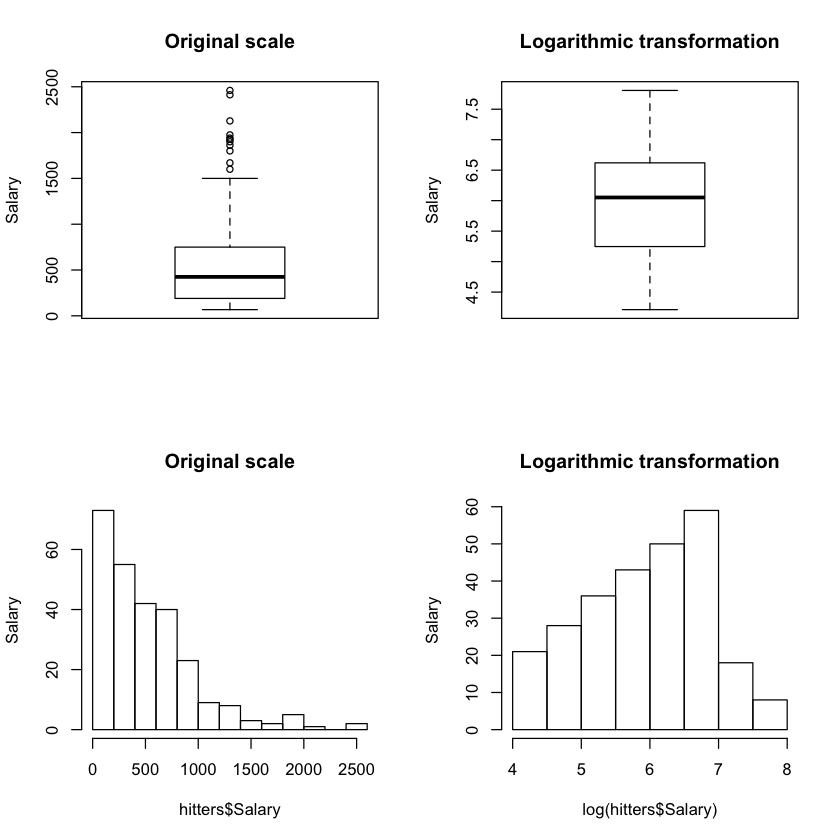

In [4]:
par(mfrow=c(2,2))
boxplot(hitters$Salary, ylab='Salary', main='Original scale')
boxplot(log(hitters$Salary), ylab='Salary', main='Logarithmic transformation')

hist(hitters$Salary, ylab='Salary', main='Original scale')
hist(log(hitters$Salary), ylab='Salary', main='Logarithmic transformation')

In [5]:
##boxplot and hist to check normality(if there isn't apply log transf otherwise not)

#par(mfrow=c(2,2))
#boxplot(mydata$Y, ylab='Yy', main='Original scale',col="lightblue")
#boxplot(log(mydata$Y), ylab='Y', main='Logarithmic transformation',col="lightblue")

#hist(mydata$Y, ylab='Yy', main='Original scale',col="lightblue")
#hist(log(mydata$Y), ylab='Y', main='Logarithmic transformation',col="lightblue")

In [6]:
## choosing logarithm Y

# mydata$Y <- log(mydata$Y)

In [7]:
hitters$Salary <- log(hitters$Salary)

In [9]:
library(leaps)
m.forward <- regsubsets(Salary ~ ., data=hitters, nvmax=19, method='forward')
summary(m.forward )

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 
2 

In [ ]:
## forward regression


#library(leaps)
#m.forward <- regsubsets(Y ~ ., data=mydata, nvmax= numero covariates, method='forward')
#summary(m.forward)

## NB il numero di covariate lo trovi dalle dimensioni -1 dato che devi rimuovere le Y

In [10]:
summary(m.forward)$rss
which.min(summary(m.forward)$rss)
coef(m.forward, 19)
which.min(summary(m.forward)$bic)
coef(m.forward, 4)

[1] 127.24377 107.31192 104.19696 101.89625  99.82172  98.31075  96.38157
 [8]  94.52650  93.75989  93.18646  92.70504  92.43868  91.62009  91.57899
[15]  91.51304  91.49201  91.46237  91.44653  91.44630

[1] 19

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.618143e+00 -2.983835e-03  1.308450e-02  1.179338e-02 -1.419299e-03 
          RBI         Walks         Years        CAtBat         CHits 
-1.675456e-03  1.095506e-02  5.696428e-02  1.282973e-04 -4.413856e-04 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
-7.808898e-05  1.512926e-03  1.311826e-04 -1.465848e-03  2.824751e-01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.656435e-01  3.389042e-04  6.213909e-04 -1.196690e-02 -1.741606e-01

[1] 4

(Intercept)        Hits       Years       CRuns     PutOuts 
4.432357335 0.006780439 0.053285280 0.000753155 0.000351109

- The model with smallest RSS is the model number 19, that is, the model with the all the available covariates. Using BIC, instead, the best model includes the following covariates.


In [ ]:
## BIC and RSS

#rss
#summary(m.forward)$rss
#which.min(summary(m.forward)$rss)
#coef(m.forward, numero che ti esce da comando sopra per rss)

# BIc
#which.min(summary(m.forward)$bic)
#coef(m.forward,  numero che ti esce da comando sopra per bic)

## variance and sd for the estimators

# vcov(m.forward, numero che ti esce da comando sopra per bic)

#sqrt(diag(vcov(m.forward, numero che ti esce comando sopra per bic)))

#### comment:
- the model with the smallest RSS is the model with ... covariates
- usign BIC instead the best model includes.. covariates

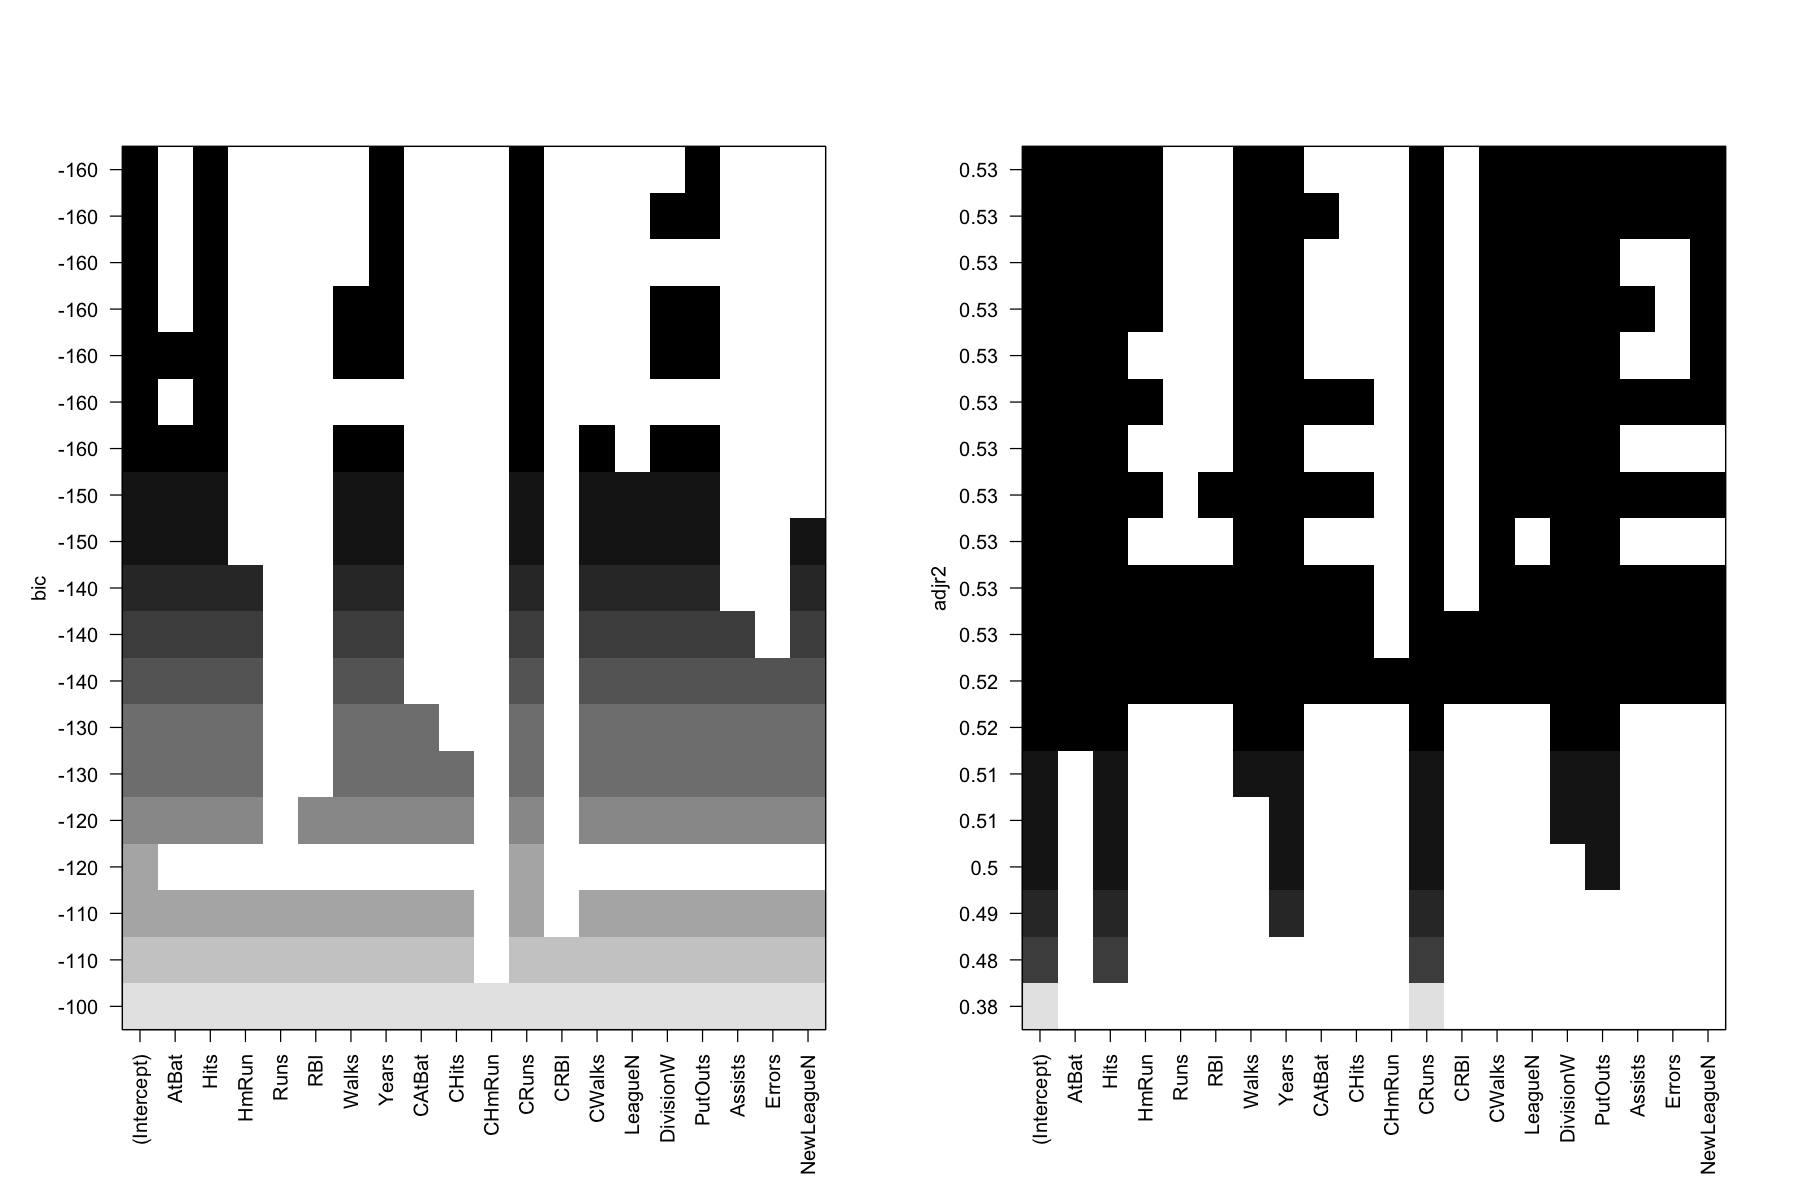

In [20]:
par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(m.forward)
plot(m.forward, scale='adjr2')

The default graphics provided by functionalities within library leaps shows the selection
of the covariates according to different criteria. BIC is the default selection.
The covariates remaining in the best model, the one with the smallest BIC, are indicated
in black in the upper part of the panel. There are 4 covariates (intercept excluded), as
concluded before.


In [ ]:
## selection plot

#par(mfrow=c(1,2))
#options(repr.plot.width = 15, repr.plot.height = 10)
#plot(m.forward)
#plot(m.forward, scale='adjr2')

#### comment

we see as computed before that the best model basing on BIC is... (conta i quadrati nella prima riga)

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 13 for adjr2 and 4 for BIC"

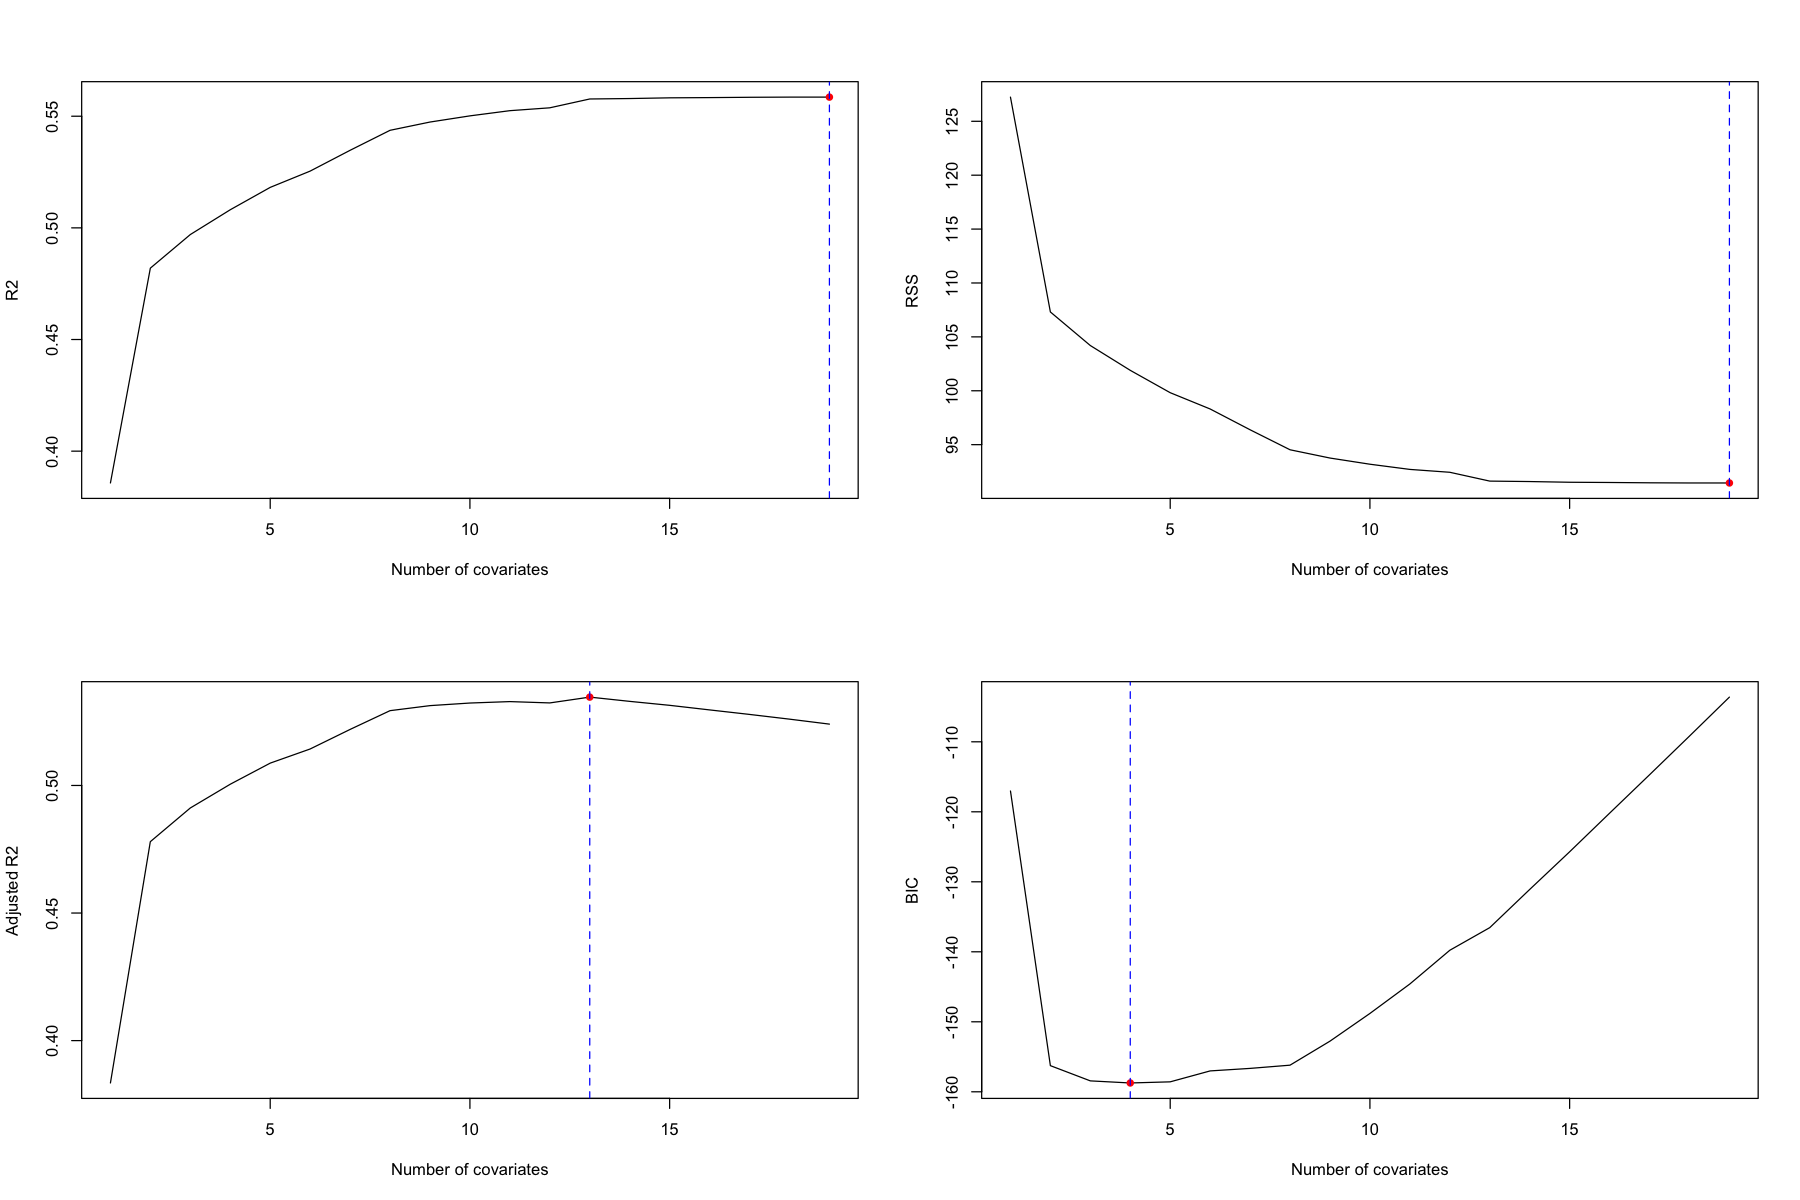

In [36]:
par(mfrow=c(2,2))
## R2
plot(summary(m.forward)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.forward)$rsq)
points(max.rsq, summary(m.forward)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)
## RSS
plot(summary(m.forward)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.forward)$rss)
points(min.rss, summary(m.forward)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)
## Adjusted R2
plot(summary(m.forward)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.forward)$adjr2)
points(max.adjr2, summary(m.forward)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)
## BIC
plot(summary(m.forward)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.forward)$bic)
points(min.bic, summary(m.forward)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 

In [ ]:
#par(mfrow=c(2,2))
## R2
#plot(summary(m.forward)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
#max.rsq <- which.max(summary(m.forward)$rsq)
#points(max.rsq, summary(m.forward)$rsq[max.rsq], col='red', pch=16)
#abline(v=max.rsq, col="blue",lty=2)


## RSS
#plot(summary(m.forward)$rss, xlab='Number of covariates', ylab='RSS', type='l')
#min.rss <- which.min(summary(m.forward)$rss)
#points(min.rss, summary(m.forward)$rss[min.rss], col='red', pch=16)
#abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
#plot(summary(m.forward)$adjr2, xlab='Number of covariates',
#ylab='Adjusted R2', type='l')
#max.adjr2 <- which.max(summary(m.forward)$adjr2)
#points(max.adjr2, summary(m.forward)$adjr2[max.adjr2], col='red', pch=16)
#abline(v=max.adjr2, col="blue",lty=2)


## BIC
#plot(summary(m.forward)$bic, xlab='Number of covariates', ylab='BIC', type='l')
#min.bic <- which.min(summary(m.forward)$bic)
#points(min.bic, summary(m.forward)$bic[min.bic], col='red', pch=16)
#abline(v=min.bic, col="blue",lty=2)


#paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 

#### comment 
base on BIC we keep the model with the lowest BIC so with a number of covariates equal to : Vedi sopra

In [37]:
model.bic <- lm(Salary ~ Hits + Years + CRuns + PutOuts, data=hitters)
summary(model.bic)


Call:
lm(formula = Salary ~ Hits + Years + CRuns + PutOuts, data = hitters)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.12133 -0.47896  0.06933  0.41313  3.08501 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.4323573  0.1364767  32.477  < 2e-16 ***
Hits        0.0067804  0.0010049   6.747 9.88e-11 ***
Years       0.0532853  0.0184531   2.888  0.00421 ** 
CRuns       0.0007532  0.0002749   2.739  0.00658 ** 
PutOuts     0.0003511  0.0001455   2.414  0.01649 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6284 on 258 degrees of freedom
Multiple R-squared:  0.5081,	Adjusted R-squared:  0.5005 
F-statistic: 66.63 on 4 and 258 DF,  p-value: < 2.2e-16


In [38]:
## linear regression based on plot for BIC variables (metti i nomi alle variabili x)

#model.bic <- lm(Y ~ x1 + x2 + ... + xn, data=mydata)
#summary(model.bic)

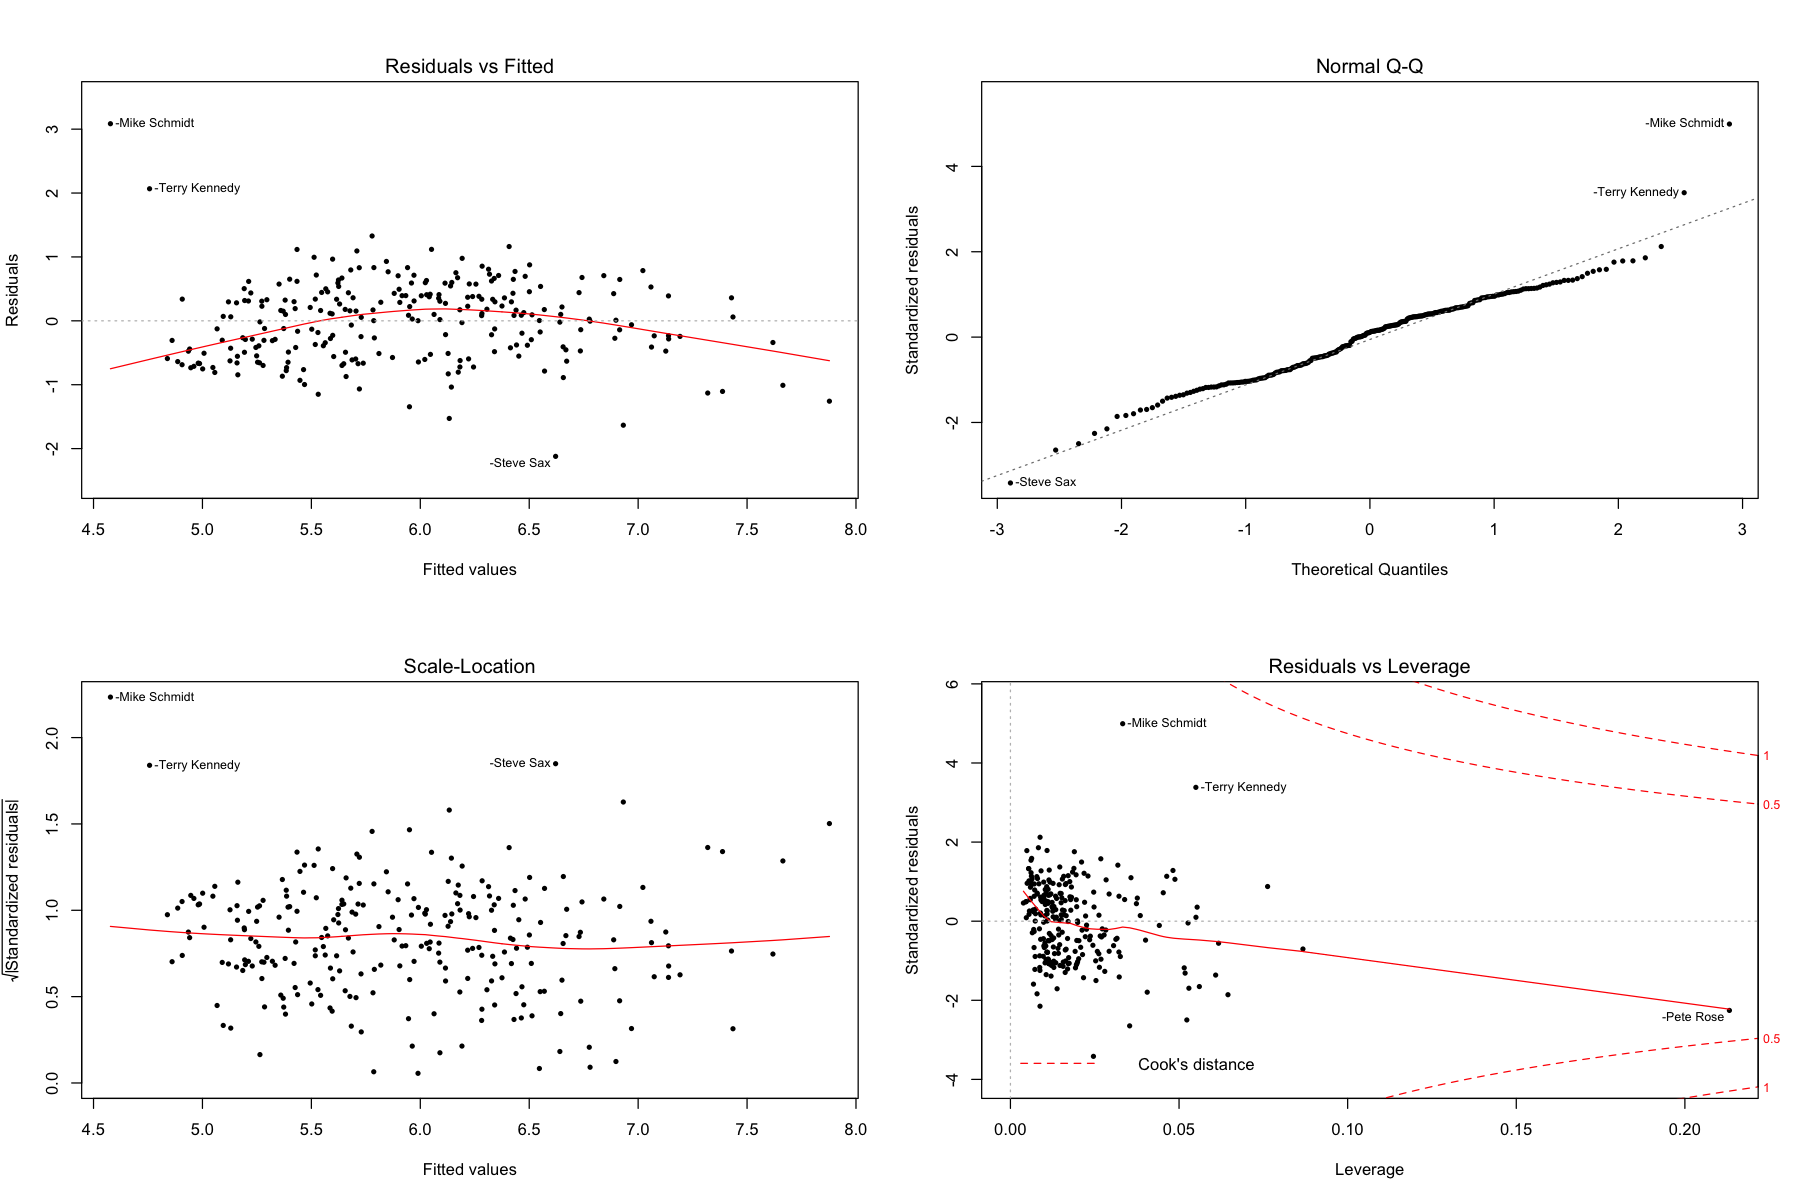

In [39]:
par(mfrow=c(2,2))
plot(model.bic, pch=16, cex=0.7)

In [ ]:
## residuals

#par(mfrow=c(2,2))
#plot(model.bic, pch=16, cex=0.7)

#### comment

###### if the residuals sucks
The graph of residuals indicates that the model does not have a good fit. In fact, the first graph (scatter plot of the residuals) shows a deterministic pattern that should not actually be there. In addition, the mean of the residuals does not appear to be 0 and the variance of the residuals does not appear to be constant, as it should be based on the assumptions that the regression model places on the ε errors. Furthermore, the normality of the residuals is not satisfied either, as highlighted in the second graph: the empirical quantiles, in fact, deviate from the theoretical quantiles of a standard normal. Possible solutions include the inclusion of new explanatory variables, possibly with interactions and/or the inclusion of polynomial terms associated with the quantitative variables.
To complete the analysis of the residuals, no outliers appear to be present: although R highlights observations, these do not represent outlier observations since Cook's distance is not large.

(NATURALMENTE CONTROLLA OUTLIERS ECC)

###### if the residuals are good

scrivi il contrario di quello che cè sopra

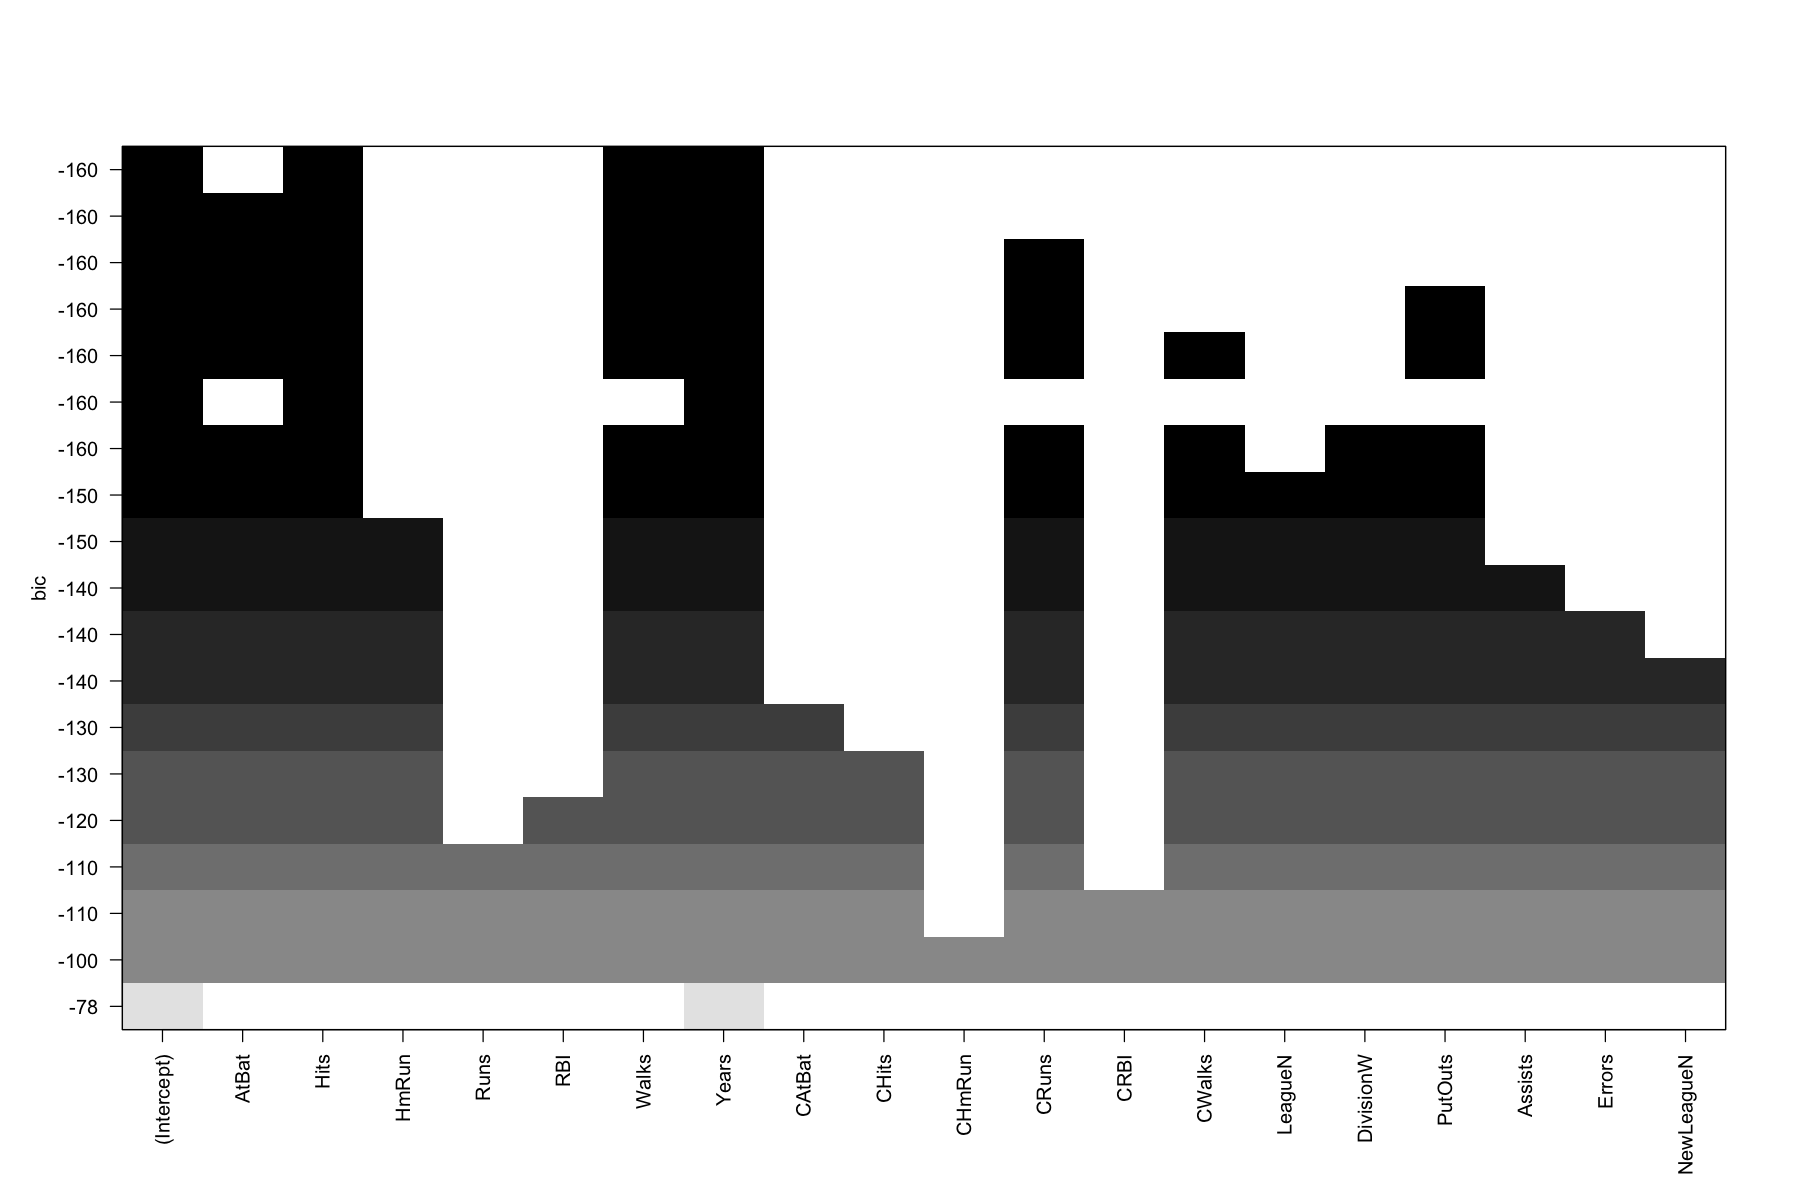

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 13 for adjr2 and 3 for BIC"

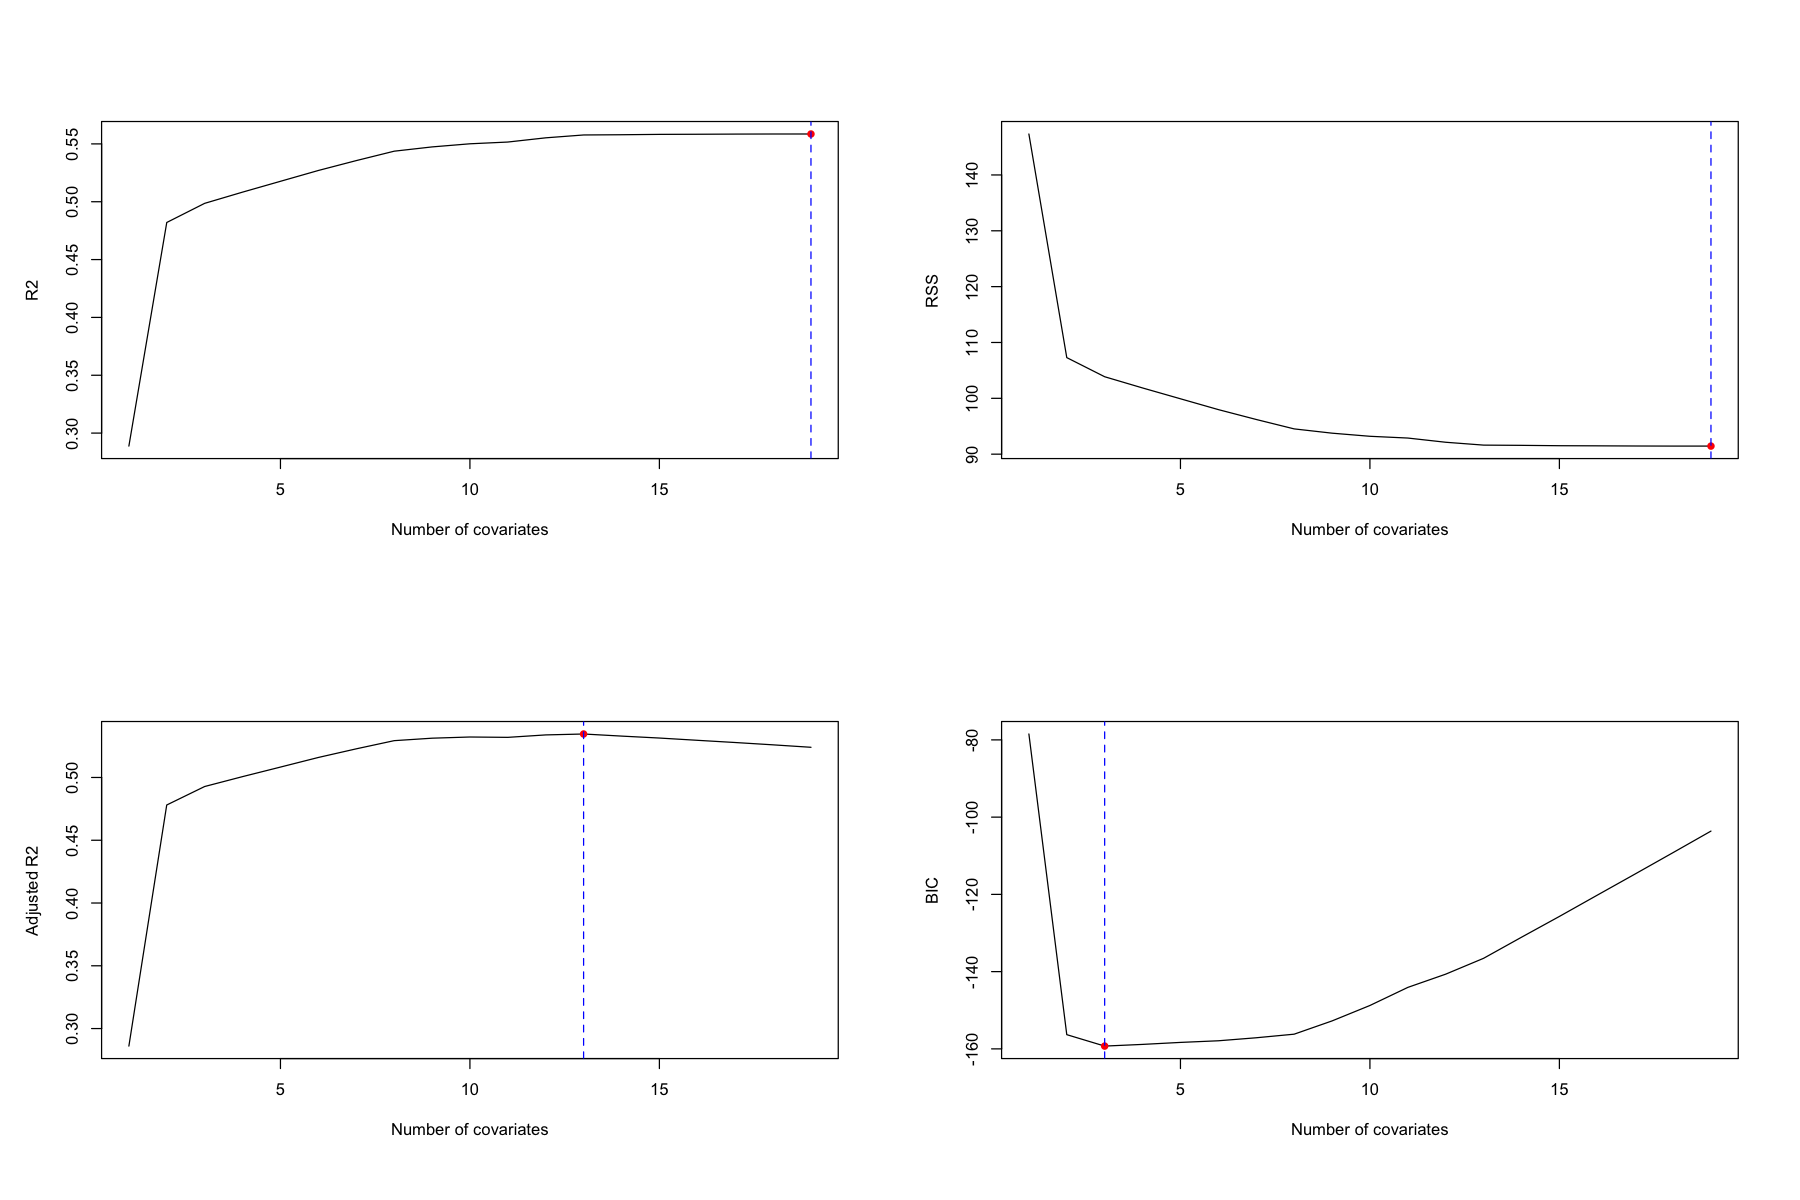

In [42]:
m.backward <- regsubsets(Salary ~ ., data=hitters, nvmax=19, method='backward')
plot(m.backward)
par(mfrow=c(2,2))
## R2
plot(summary(m.backward)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.backward)$rsq)
points(max.rsq, summary(m.backward)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)
## RSS
plot(summary(m.backward)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.backward)$rss)
points(min.rss, summary(m.backward)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)
## Adjusted R2
plot(summary(m.backward)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.backward)$adjr2)
points(max.adjr2, summary(m.backward)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)
## BIC
plot(summary(m.backward)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.backward)$bic)
points(min.bic, summary(m.backward)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 

As you can see, forward and backward selection do not necessarily choose the same
models

In [ ]:
### backword selection

#m.backward <- regsubsets(Y ~ ., data=mydata, nvmax=19, method='backward')
#plot(m.backward)

#par(mfrow=c(2,2))
## R2
#plot(summary(m.backward)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
#max.rsq <- which.max(summary(m.backward)$rsq)
#points(max.rsq, summary(m.backward)$rsq[max.rsq], col='red', pch=16)
#abline(v=max.rsq, col="blue",lty=2)


## RSS
#plot(summary(m.backward)$rss, xlab='Number of covariates', ylab='RSS', type='l')
#min.rss <- which.min(summary(m.backward)$rss)
#points(min.rss, summary(m.backward)$rss[min.rss], col='red', pch=16)
#abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
#plot(summary(m.backward)$adjr2, xlab='Number of covariates',
#ylab='Adjusted R2', type='l')
#max.adjr2 <- which.max(summary(m.backward)$adjr2)
#points(max.adjr2, summary(m.backward)$adjr2[max.adjr2], col='red', pch=16)
#abline(v=max.adjr2, col="blue",lty=2)


## BIC
#plot(summary(m.backward)$bic, xlab='Number of covariates', ylab='BIC', type='l')
#min.bic <- which.min(summary(m.backward)$bic)
#points(min.bic, summary(m.backward)$bic[min.bic], col='red', pch=16)
#abline(v=min.bic, col="blue",lty=2)


#paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 

#### comment

As you can see, forward and backward selection do not necessarily choose the same
models. In fact in this case we have .... covariates

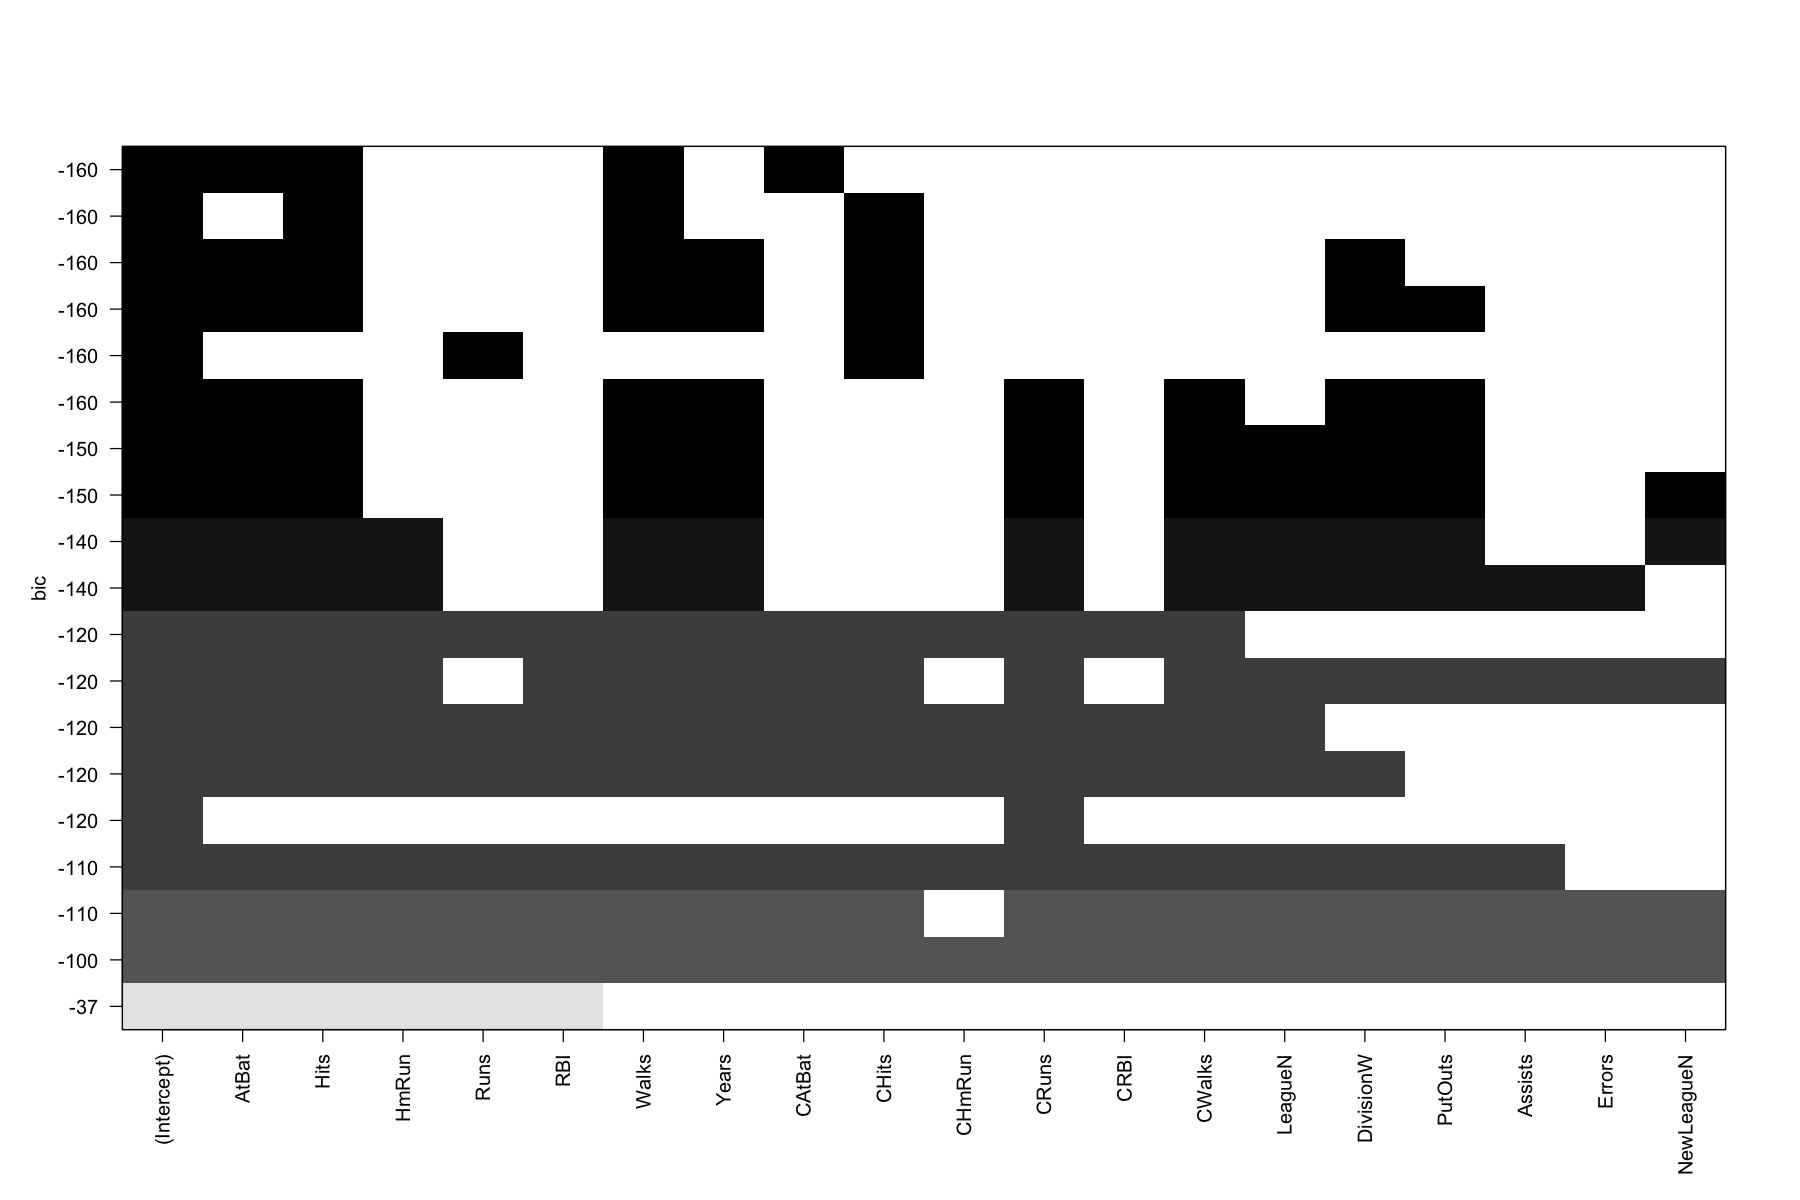

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 12 for adjr2 and 4 for BIC"

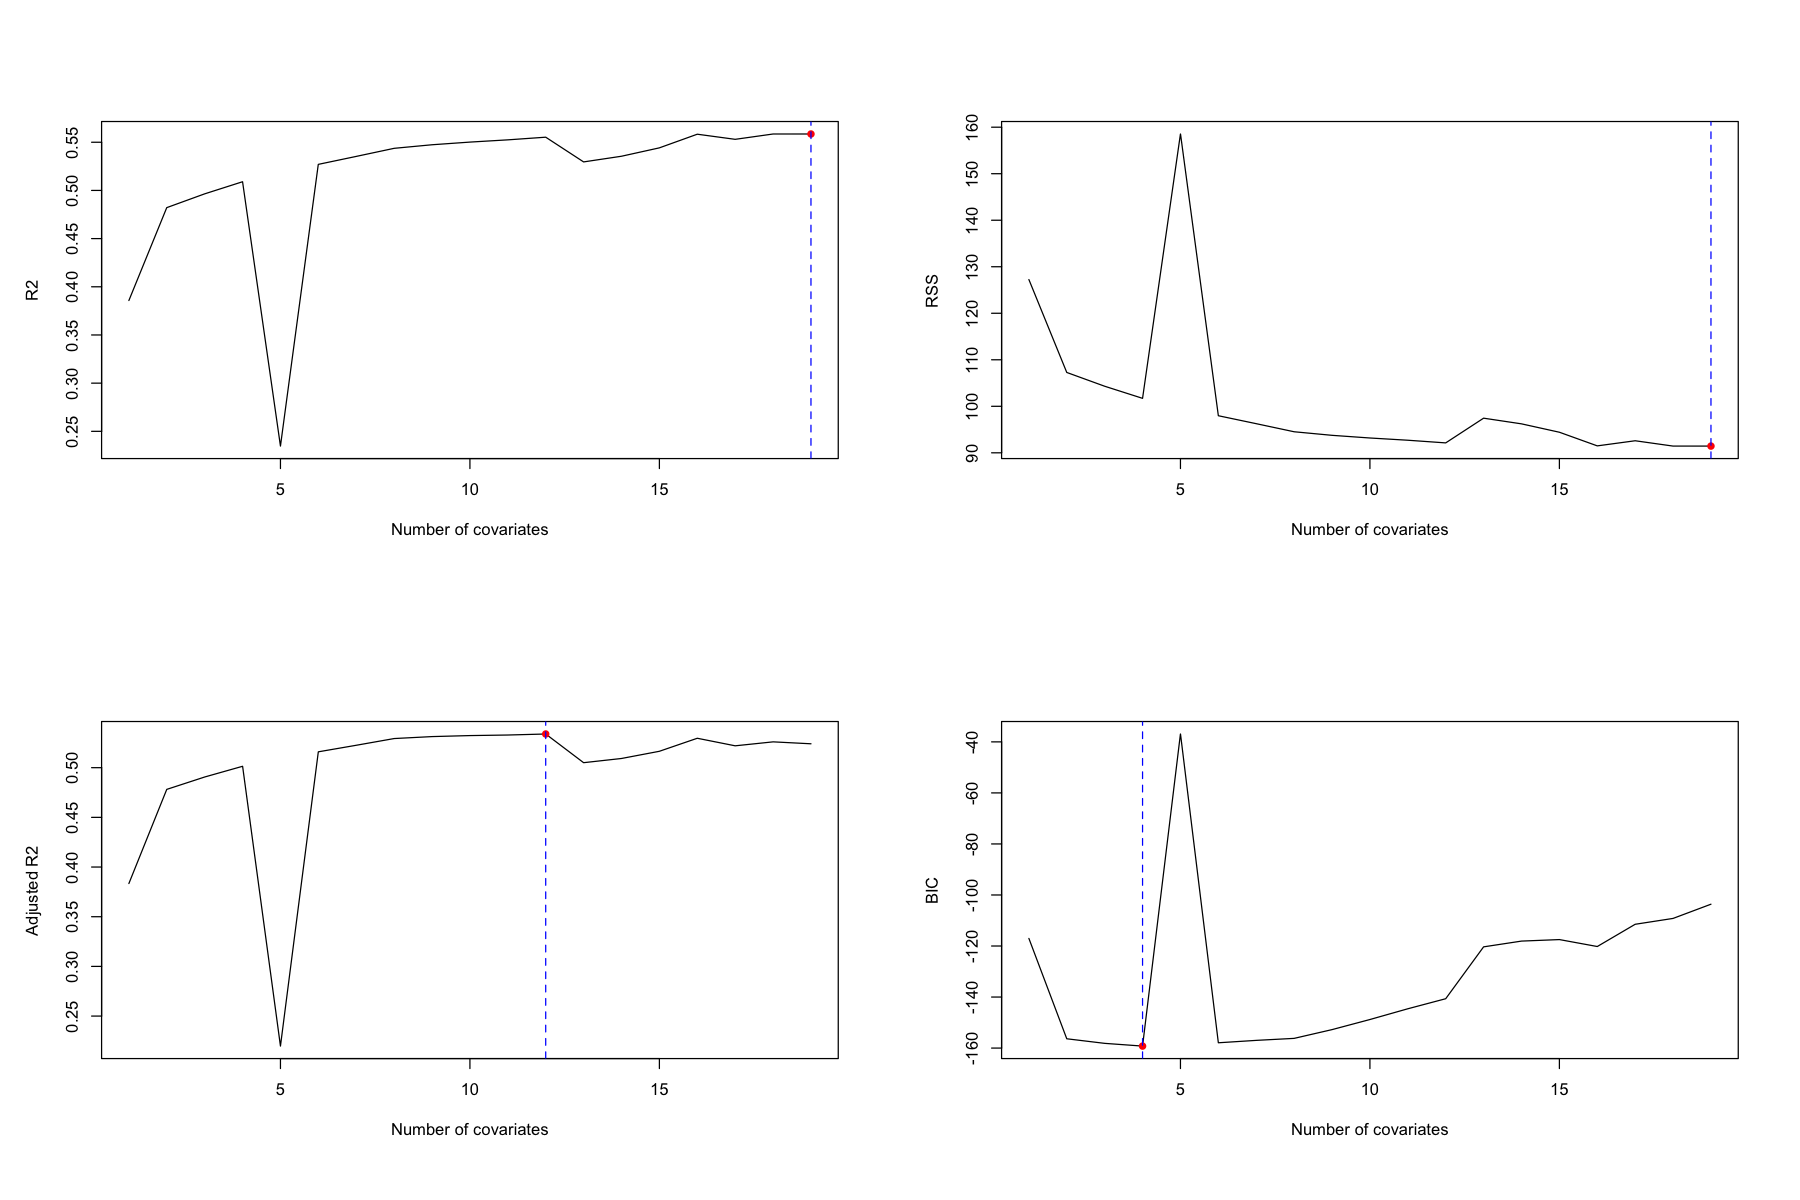

In [45]:
m.seqrep <- regsubsets(Salary ~ ., data=hitters, nvmax=19, method='seqrep')
plot(m.seqrep)


par(mfrow=c(2,2))
## R2
plot(summary(m.seqrep)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.seqrep)$rsq)
points(max.rsq, summary(m.seqrep)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)


## RSS
plot(summary(m.seqrep)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.seqrep)$rss)
points(min.rss, summary(m.seqrep)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
plot(summary(m.seqrep)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.seqrep)$adjr2)
points(max.adjr2, summary(m.seqrep)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)


## BIC
plot(summary(m.seqrep)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.seqrep)$bic)
points(min.bic, summary(m.seqrep)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 


In [ ]:
### mixed selection

#m.seqrep <- regsubsets(Y ~ ., data=mydata, nvmax=19, method='seqrep')
#plot(m.seqrep)

#par(mfrow=c(2,2))
## R2
#plot(summary(m.seqrep)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
#max.rsq <- which.max(summary(m.seqrep)$rsq)
#points(max.rsq, summary(m.seqrep)$rsq[max.rsq], col='red', pch=16)
#abline(v=max.rsq, col="blue",lty=2)


## RSS
#plot(summary(m.seqrep)$rss, xlab='Number of covariates', ylab='RSS', type='l')
#min.rss <- which.min(summary(m.seqrep)$rss)
#points(min.rss, summary(m.seqrep)$rss[min.rss], col='red', pch=16)
#abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
#plot(summary(m.seqrep)$adjr2, xlab='Number of covariates',
#ylab='Adjusted R2', type='l')
#max.adjr2 <- which.max(summary(m.seqrep)$adjr2)
#points(max.adjr2, summary(m.seqrep)$adjr2[max.adjr2], col='red', pch=16)
#abline(v=max.adjr2, col="blue",lty=2)


## BIC
#plot(summary(m.seqrep)$bic, xlab='Number of covariates', ylab='BIC', type='l')
#min.bic <- which.min(summary(m.seqrep)$bic)
#points(min.bic, summary(m.seqrep)$bic[min.bic], col='red', pch=16)
#abline(v=min.bic, col="blue",lty=2)


#paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 


#### comment


As you can see,  In fact in this case we have .... covariates